# Clasificación de Noticias Utilizando Técnicas de Procesamiento del Lenguaje Natural.
**Autor original: Carlos Zainea**\
**Modificado por: Elias Buitrago B.**\
Bogotá, Colombia \
Actualizado: 30 oct 2023 \
_Nota: Código ajustado para su ejecución en Google Colaboratory_\
Actualizado para las versiones recientes de las librerías, pero no se encuentra depurado respecto a la versión original del año 2020_

In [ ]:
!pip install stop-words

  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32896 sha256=739ea872b0f49da693cc2b0b0d32a5f5cdeff38eb9e6c335a02aeae3a77e7eba
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop-words


In [ ]:
import re
import pandas as pd
import nltk
nltk.download('punkt')
import numpy as np
from bs4 import BeautifulSoup
from PIL import Image
from urllib.request import urlopen
from wordcloud import WordCloud, ImageColorGenerator
from stop_words import get_stop_words
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Noticiastrain=pd.read_excel("/content/drive/MyDrive/data/Noticias2ver.xlsx",index_col=0)

In [ ]:
pd.value_counts(Noticiastrain['Tipo'])

Variedades            244
colombia              181
Politica y Opinion    125
deportes              113
mundo                 101
Justicia               73
bogota                 60
economia               51
salud                  27
Name: Tipo, dtype: int64

In [ ]:
# from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords=set(stopwords.words('spanish'))
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
path = get_tmpfile("word2vec.model")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
Noticias2=[]
try:
    for i in Noticiastrain["contenido"]:
        Noticias2.append(re.sub( "[^A-Za-zóáéíúÁÉÍÓÚüÜñ.]+",' ',i))
except Exception:
    pass

In [ ]:
Noticiasinparada=[]
for i in range(len(Noticias2)):
    Noticiasinparada.append([j.lower() for j in Noticias2[i].split() if not j.lower() in stopwords])

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
model = Word2Vec(Noticiasinparada, vector_size=100, window=10, min_count=1, workers=4)
model.save("word2vec.model")

In [ ]:
model = Word2Vec.load("word2vec.model")
model.wv.index_to_key

['cuarentena',
 'p.m.',
 '.',
 'coronavirus',
 'santa',
 '...',
 'país',
 'colombia',
 'hacer',
 'ahora',
 'gente',
 'pico',
 'personas',
 'pasó',
 'modelo',
 'bucaramanga',
 'cédula',
 'marta',
 'si',
 'clientes',
 'sitios',
 'piden',
 'bahía',
 'sexuales',
 'webcam',
 'cumpla',
 'luce',
 'so',
 'conejo',
 'elena',
 'desnudarse',
 'consolar',
 'fantasías',
 'multada',
 'implementan',
 'cristalina',
 'puede',
 'salud',
 'ser',
 'tiempo',
 'covid',
 'gobierno',
 'policía',
 'años',
 'ciudadanos',
 'así',
 'trata',
 'dos',
 'según',
 'casos',
 'solo',
 'además',
 'pandemia',
 'antioquia',
 'empresa',
 'departamentos',
 'confinamiento',
 'alcohol',
 'aplicar',
 'días',
 'nacional',
 'comparendos',
 'llegará',
 'cartagena',
 'parte',
 'medidas',
 'fla',
 'antiséptico',
 'dijo',
 'baja',
 'generación',
 'hace',
 'conductores',
 'millones',
 'c',
 'masivo',
 'momento',
 'mundo',
 'bogotá',
 'cuenta',
 'residuos',
 'sustenta',
 'cada',
 'despido',
 'tener',
 'barrenderos',
 'crisis',
 'despid

In [ ]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [ ]:
Cat=list(Noticiastrain["Tipo"].value_counts().index)

In [ ]:
dictCodeCat={Cat[i]:i for i in range(len(Cat))}
dictCodeCat

{'Variedades': 0,
 'colombia': 1,
 'Politica y Opinion': 2,
 'deportes': 3,
 'mundo': 4,
 'Justicia': 5,
 'bogota': 6,
 'economia': 7,
 'salud': 8}

In [ ]:
CodeCat=[Cat.index(i) for i in Noticiastrain["Tipo"]]

In [ ]:
NoticiasinparadaC=[" ".join(i) for i in Noticiasinparada]

In [ ]:
DF=pd.DataFrame({"Contenido_limpio":NoticiasinparadaC,"Tipo":Noticiastrain["Tipo"],"CodeCat":CodeCat})

In [ ]:
DF

,Contenido_limpio,Tipo,CodeCat
Columna1,,,
0,medio coyuntura ocasionada propagación coronav...,economia,7
1,jueves noveno día cuarentena nacional presiden...,Politica y Opinion,2
2,jenny prieto álex caro pareja cultivadores jen...,Variedades,0
3,aunque secretaría educación recomendó padres f...,bogota,6
4,presidente congreso lidio garcía anunció próxi...,Politica y Opinion,2
...,...,...,...
970,frente medidas preventivas dispuesto gobierno ...,economia,7
971,agosto año pasado hombre años presentó tutela ...,Justicia,5
972,presidente iván duque aseguró entrevista pregu...,Politica y Opinion,2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(DF['Contenido_limpio'],
                                                    DF['CodeCat'],
                                                    test_size=0.15,
                                                    random_state=8)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(encoding='utf-8',
                        stop_words=None,
                        lowercase=False,
                        ngram_range = (1,2),
                        max_df=10,
                        min_df=1,
                        max_features=300,
                        norm='l2',
                        sublinear_tf=True)

features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(828, 300)
(147, 300)


In [ ]:
from sklearn.feature_selection import chi2
import numpy as np

for Product, category_id in sorted(dictCodeCat.items()):
  features_chi2 = chi2(features_train, labels_train == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}' category:".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
  print("")

# 'Justicia' category:
  . Most correlated unigrams:
. extradición
. vuelo
. tribunal
. prisiones
. carcelaria
  . Most correlated bigrams:
. fiscalía general
. corte suprema

# 'Politica y Opinion' category:
  . Most correlated unigrams:
. prepararnos
. promotores
. congresista
. sesionar
. senadores
  . Most correlated bigrams:
. sesiones virtuales
. señor director

# 'Variedades' category:
  . Most correlated unigrams:
. banda
. world
. apple
. microsoft
. videojuegos
  . Most correlated bigrams:
. aplicación spotify
. ministerio educación

# 'bogota' category:
  . Most correlated unigrams:
. intensivo
. homicidios
. arriendos
. bono
. ctpd
  . Most correlated bigrams:
. bogotá región
. contrato social

# 'colombia' category:
  . Most correlated unigrams:
. villavicencio
. ipiales
. valledupar
. cédulas
. gobernadora
  . Most correlated bigrams:
. fiscalía general
. cédulas terminadas

# 'deportes' category:
  . Most correlated unigrams:
. ligas
. fifa
. messi
. tour
. juventus
  . 

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns

mnbc = MultinomialNB()
mnbc

MultinomialNB()

In [ ]:
mnbc.fit(features_train, labels_train)

MultinomialNB()

In [ ]:
mnbc_pred = mnbc.predict(features_test)

In [ ]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train)))

The training accuracy is: 
0.5978260869565217


In [ ]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, mnbc_pred))

The test accuracy is: 
0.3741496598639456


In [ ]:
# Classification report
print("Classification report")
print(classification_report(labels_test,mnbc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.30      0.83      0.44        30
           1       0.41      0.41      0.41        29
           2       0.25      0.14      0.18        21
           3       0.80      0.50      0.62        16
           4       0.67      0.35      0.46        17
           5       0.50      0.07      0.12        14
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         3

    accuracy                           0.37       147
   macro avg       0.33      0.26      0.25       147
weighted avg       0.39      0.37      0.33       147



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


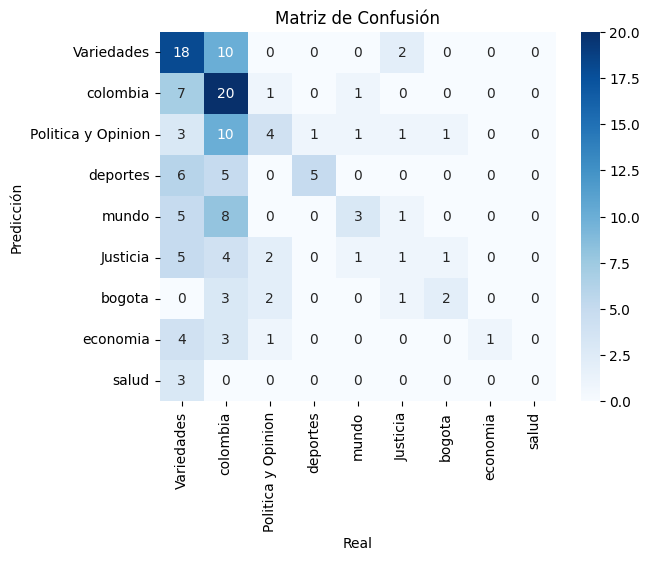

In [ ]:
aux_df = DF[['Tipo', 'CodeCat']].drop_duplicates().sort_values('CodeCat')
conf_matrix = confusion_matrix(labels_test, mnbc_pred)
plt.figure()
sns.heatmap(conf_matrix,
            annot=True,
            xticklabels=aux_df['Tipo'].values,
            yticklabels=aux_df['Tipo'].values,
            cmap="Blues")
plt.ylabel('Predicción')
plt.xlabel('Real')
plt.title('Matriz de Confusión')
plt.show()



The training accuracy is: 
0.6292270531400966
Classification report
              precision    recall  f1-score   support

           0       0.30      0.83      0.44        30
           1       0.50      0.52      0.51        29
           2       0.18      0.10      0.12        21
           3       0.78      0.44      0.56        16
           4       0.50      0.24      0.32        17
           5       0.33      0.07      0.12        14
           6       0.00      0.00      0.00         8
           7       1.00      0.11      0.20         9
           8       0.00      0.00      0.00         3

    accuracy                           0.37       147
   macro avg       0.40      0.26      0.25       147
weighted avg       0.42      0.37      0.33       147



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


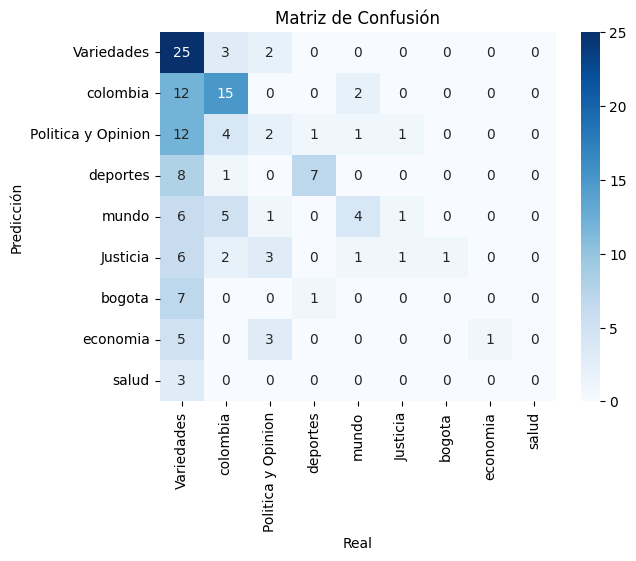

In [ ]:
from sklearn.linear_model import LogisticRegression

mnbc = LogisticRegression(random_state = 8)
mnbc
mnbc.fit(features_train, labels_train)
mnbc_pred = mnbc.predict(features_test)
print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train)))
# Classification report
print("Classification report")
print(classification_report(labels_test,mnbc_pred))

aux_df = DF[['Tipo', 'CodeCat']].drop_duplicates().sort_values('CodeCat')
conf_matrix = confusion_matrix(labels_test, mnbc_pred)
plt.figure()
sns.heatmap(conf_matrix,
            annot=True,
            xticklabels=aux_df['Tipo'].values,
            yticklabels=aux_df['Tipo'].values,
            cmap="Blues")
plt.ylabel('Predicción')
plt.xlabel('Real')
plt.title('Matriz de Confusión')
plt.show()


The training accuracy is: 
0.6509661835748792
Classification report
              precision    recall  f1-score   support

           0       0.35      0.60      0.44        30
           1       0.32      0.69      0.43        29
           2       0.40      0.19      0.26        21
           3       0.83      0.31      0.45        16
           4       0.50      0.18      0.26        17
           5       0.17      0.07      0.10        14
           6       0.50      0.25      0.33         8
           7       1.00      0.11      0.20         9
           8       0.00      0.00      0.00         3

    accuracy                           0.37       147
   macro avg       0.45      0.27      0.28       147
weighted avg       0.44      0.37      0.33       147



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


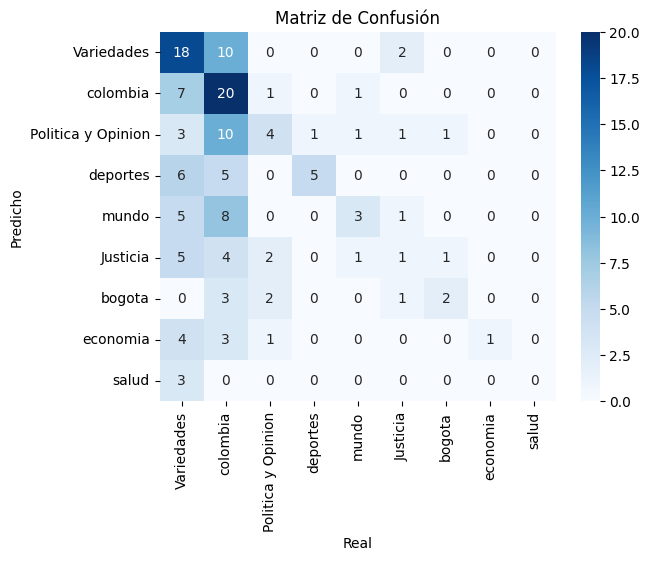

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

mnbc = KNeighborsClassifier(n_neighbors=2)
mnbc
mnbc.fit(features_train, labels_train)
mnbc_pred = mnbc.predict(features_test)
print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train)))
# Classification report
print("Classification report")
print(classification_report(labels_test,mnbc_pred))

aux_df = DF[['Tipo', 'CodeCat']].drop_duplicates().sort_values('CodeCat')
conf_matrix = confusion_matrix(labels_test, mnbc_pred)
plt.figure()
sns.heatmap(conf_matrix,
            annot=True,
            xticklabels=aux_df['Tipo'].values,
            yticklabels=aux_df['Tipo'].values,
            cmap="Blues")
plt.ylabel('Predicho')
plt.xlabel('Real')
plt.title('Matriz de Confusión')
plt.show()